In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# From Mark:

# "For our 1D tests, I looked at my Matlab code that does this (solve u_t + u_x = 0), and I was using the
# leapfrog-trapazoid rule. This is a foward euler step to t+1/2, and then using the values at t and t+1/2, 
# do a leapfrog step to t+1. It's a simple scheme that is stable for equations with pure imaginary eigenvalues so it's a good place to start."

## Leapfrog-Trapazoid Rule:

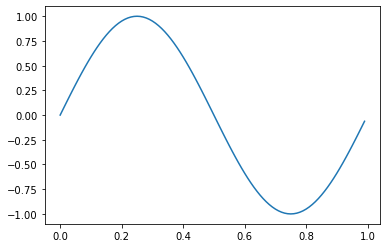

In [3]:
x = np.arange(0, 1, 0.01)
u = np.sin(2*np.pi*x)
plt.plot(x, u)

In [4]:
def ic_1(x_range):
    return(np.sin(2 * np.pi * x_range))

def ic_2(x_range):
    array_out = np.zeros(len(x_range))
    index = np.where(x_range[np.where(x_range <= 1)] >= -1)
    array_out[index[0][0] : index[0][-1] + 1] = 1
    return(array_out)

In [68]:
def centered_dx(u, j, pos):
    if pos == 'left':
        dx = (u[1] - u[-1]) / 2
    elif pos == 'right':
        dx = (u[0] - u[-2]) / 2
    else:
        dx = (u[j+1] - u[j-1]) / 2
    
    return(dx)
    
def upwind_dx(u, j, pos):
    # For a < 0:
    if pos == 'left':
        dx = (u[1] - u[0]) 
    elif pos == 'right':
        dx = (u[0] - u[-1]) 
    else:
        dx = u[j+1] - u[j]
        
    return(dx)

In [73]:
t_steps = 30
x_steps = 100
dx = 10 / (x_steps)
CFL = 0.10
dt = CFL * (2 * dx)

# Set the initial condition:
# u = np.sin(2 * np.pi * np.arange(0.0, 1.0 + dx, dx))
u = ic_2(np.arange(-5, 5, dx))

for i in np.arange(0, t_steps, dt):
        
    u_mid = np.zeros(x_steps)
    u_n = np.zeros(x_steps)
    
    # Half time step:
    for j in np.arange(1, x_steps-1):
        u_mid[j] = u[j] + (((dt / dx) / 2) * centered_dx(u, j, 0))
        
    # Implement periodic boundary conditions:
    u_mid[0] = u[0] + (((dt / dx) / 2) * centered_dx(u, j, 'left'))
    u_mid[-1] = u[-1] + (((dt / dx) / 2) * centered_dx(u, j, 'right'))
        
    # Full time step:
    for j in np.arange(1, x_steps-1):
        u_n[j] = u[j] + (((dt / dx)) * (centered_dx(u_mid, j, 0)))
        
    # Implement periodic boundary conditions:
    u_n[0] = u[0] + (((dt / dx)) * (centered_dx(u_mid, j, 'left')))
    u_n[-1] = u[-1] + (((dt / dx)) * (centered_dx(u_mid, j, 'right')))
        
    u = u_n


(-0.5, 1.1)

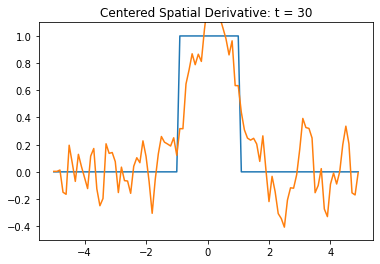

In [74]:
plt.plot(np.arange(-5, 5, dx), ic_2(np.arange(-5, 5, dx)))
plt.plot(np.arange(-5, 5, dx), u_n)
plt.title('Centered Spatial Derivative: t = 30')
plt.ylim(-0.5, 1.1)